In [ ]:
import random

# Define parameters for the beam
beam_length = 10  # Length of the beam in meters
E = 210e9  # Modulus of Elasticity in Pascals
I = 5e-6  # Moment of Inertia in m^4
num_loads = random.randint(3, 6)  # Number of random loads to generate

# Initialize lists to store loads information
loads = []

# Generate random loads (UDL, UVL, Point Load)
for i in range(num_loads):
    load_type = random.choice(['UDL', 'UVL', 'Point'])
    position = round(random.uniform(0, beam_length), 2)  # Position of the load in meters
    magnitude = round(random.uniform(1, 5), 2)  # Magnitude of the load in kN or kN/m

    if load_type == 'UDL':
        # UDL acts over a segment; start and end within beam length
        start = round(random.uniform(0, beam_length - 1), 2)
        end = round(random.uniform(start + 1, beam_length), 2)
        loads.append((load_type, magnitude, start, end))

    elif load_type == 'UVL':
        # UVL varies from 0 to magnitude over a segment
        start = round(random.uniform(0, beam_length - 1), 2)
        end = round(random.uniform(start + 1, beam_length), 2)
        loads.append((load_type, magnitude, start, end))

    elif load_type == 'Point':
        # Point load at a specific position
        loads.append((load_type, magnitude, position))

# Function to generate wxMaxima code for each load type
def generate_load_wxmaxima(loads):
    wxmaxima_code = []

    # Add initial definitions
    wxmaxima_code.append(f"/* Beam parameters */")
    wxmaxima_code.append(f"L: {beam_length};")
    wxmaxima_code.append(f"E: {E};")
    wxmaxima_code.append(f"I: {I};")
    wxmaxima_code.append("EI: E*I;")

    # Initialize reaction forces for equilibrium calculations
    wxmaxima_code.append("RA: 'RA; /* Reaction at A */")
    wxmaxima_code.append("RB: 'RB; /* Reaction at B */")

    # Initialize shear force equation
    shear_force_expr = "V(x) := RA"

    # Loop through each load and add its effect to V(x) and M(x)
    for load in loads:
        if load[0] == 'UDL':
            magnitude, start, end = load[1], load[2], load[3]
            length = end - start
            total_load = magnitude * length
            shear_force_expr += f" - ({magnitude})*({end} - x)*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UDL from {start} to {end} with intensity {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'UVL':
            magnitude, start, end = load[1], load[2], load[3]
            shear_force_expr += f" - ({magnitude}/{end - start})*(x - {start})^2/2*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UVL from {start} to {end} with maximum intensity {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'Point':
            magnitude, position = load[1], load[2]
            shear_force_expr += f" - {magnitude}*heaviside(x - {position})"
            wxmaxima_code.append(f"/* Point Load of {magnitude} kN at {position} */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

    # Generate Bending Moment equation by integrating V(x)
    wxmaxima_code.append("/* Bending Moment by integrating Shear Force */")
    wxmaxima_code.append("M(x) := integrate(V(x), x);")

    # Define ODE for deflection y(x)
    wxmaxima_code.append("/* Deflection equation */")
    wxmaxima_code.append("ODE: diff(y, x, 2) = M(x)/EI;")

    # Solve and plot
    wxmaxima_code.append("/* Apply boundary conditions and solve */")
    wxmaxima_code.append("y(x) := integrate(integrate(M(x)/EI, x) + C1, x) + C2;")
    wxmaxima_code.append("solve([y(0) = 0, y(L) = 0], [C1, C2]);")

    # Add plot commands
    wxmaxima_code.append("/* Plot Shear Force, Bending Moment, and Deflection */")
    wxmaxima_code.append("plot2d(V(x), [x, 0, L], [ylabel, 'Shear Force V(x) [kN]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(M(x), [x, 0, L], [ylabel, 'Bending Moment M(x) [kN·m]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(y(x), [x, 0, L], [ylabel, 'Deflection y(x) [m]'], [xlabel, 'x (m)']);")

    return "\n".join(wxmaxima_code)

# Generate wxMaxima code
wxmaxima_code = generate_load_wxmaxima(loads)

# Write wxMaxima code to a .txt file
with open("beam_analysis_wxmaxima_code.txt", "w") as file:
    file.write(wxmaxima_code)

# Print the wxMaxima code for preview
print(wxmaxima_code)


In [1]:
import random

# Define parameters for the beam
beam_length = 10  # Length of the beam in meters
E = 210e9  # Modulus of Elasticity in Pascals
I = 5e-6  # Moment of Inertia in m^4
num_loads = random.randint(3, 6)  # Number of random loads to generate

# Initialize lists to store loads information
loads = []

# Generate random loads (UDL, UVL, Point Load)
for i in range(num_loads):
    load_type = random.choice(['UDL', 'UVL', 'Point'])
    position = round(random.uniform(0, beam_length), 2)  # Position of the load in meters
    magnitude = round(random.uniform(1, 5), 2)  # Magnitude of the load in kN or kN/m

    if load_type == 'UDL':
        # UDL acts over a segment; start and end within beam length
        start = round(random.uniform(0, beam_length - 1), 2)
        end = round(random.uniform(start + 1, beam_length), 2)
        loads.append((load_type, magnitude, start, end))

    elif load_type == 'UVL':
        # UVL varies from 0 to magnitude over a segment
        start = round(random.uniform(0, beam_length - 1), 2)
        end = round(random.uniform(start + 1, beam_length), 2)
        loads.append((load_type, magnitude, start, end))

    elif load_type == 'Point':
        # Point load at a specific position
        loads.append((load_type, magnitude, position))

# Function to generate wxMaxima code for each load type
def generate_load_wxmaxima(loads):
    wxmaxima_code = []

    # Add initial definitions
    wxmaxima_code.append(f"/* Beam parameters */")
    wxmaxima_code.append(f"L: {beam_length};")
    wxmaxima_code.append(f"E: {E};")
    wxmaxima_code.append(f"I: {I};")
    wxmaxima_code.append("EI: E*I;")

    # Initialize reaction forces for equilibrium calculations
    wxmaxima_code.append("RA: 'RA; /* Reaction at A */")
    wxmaxima_code.append("RB: 'RB; /* Reaction at B */")

    # Initialize shear force equation
    shear_force_expr = "V(x) := RA"

    # Loop through each load and add its effect to V(x) and M(x)
    for load in loads:
        if load[0] == 'UDL':
            magnitude, start, end = load[1], load[2], load[3]
            length = end - start
            total_load = magnitude * length
            shear_force_expr += f" - ({magnitude})*({end} - x)*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UDL from {start} to {end} with intensity {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'UVL':
            magnitude, start, end = load[1], load[2], load[3]
            shear_force_expr += f" - ({magnitude}/{end - start})*(x - {start})^2/2*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UVL from {start} to {end} with maximum intensity {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'Point':
            magnitude, position = load[1], load[2]
            shear_force_expr += f" - {magnitude}*heaviside(x - {position})"
            wxmaxima_code.append(f"/* Point Load of {magnitude} kN at {position} */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

    # Generate Bending Moment equation by integrating V(x)
    wxmaxima_code.append("/* Bending Moment by integrating Shear Force */")
    wxmaxima_code.append("M(x) := integrate(V(x), x);")

    # Define ODE for deflection y(x)
    wxmaxima_code.append("/* Deflection equation */")
    wxmaxima_code.append("ODE: diff(y, x, 2) = M(x)/EI;")

    # Solve and plot
    wxmaxima_code.append("/* Apply boundary conditions and solve */")
    wxmaxima_code.append("y(x) := integrate(integrate(M(x)/EI, x) + C1, x) + C2;")
    wxmaxima_code.append("solve([y(0) = 0, y(L) = 0], [C1, C2]);")

    # Add plot commands
    wxmaxima_code.append("/* Plot Shear Force, Bending Moment, and Deflection */")
    wxmaxima_code.append("plot2d(V(x), [x, 0, L], [ylabel, 'Shear Force V(x) [kN]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(M(x), [x, 0, L], [ylabel, 'Bending Moment M(x) [kN·m]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(y(x), [x, 0, L], [ylabel, 'Deflection y(x) [m]'], [xlabel, 'x (m)']);")

    return "\n".join(wxmaxima_code)

# Generate wxMaxima code
wxmaxima_code = generate_load_wxmaxima(loads)

# Write wxMaxima code to a .txt file
with open("beam_analysis_wxmaxima_code.txt", "w") as file:
    file.write(wxmaxima_code)

# Print the wxMaxima code for preview
print(wxmaxima_code)


/* Beam parameters */
L: 10;
E: 210000000000.0;
I: 5e-06;
EI: E*I;
RA: 'RA; /* Reaction at A */
RB: 'RB; /* Reaction at B */
/* Point Load of 2.26 kN at 6.27 */
V(x) := V(x) := RA - 2.26*heaviside(x - 6.27);
/* Point Load of 3.03 kN at 9.39 */
V(x) := V(x) := RA - 2.26*heaviside(x - 6.27) - 3.03*heaviside(x - 9.39);
/* UDL from 5.1 to 8.69 with intensity 3.16 kN/m */
V(x) := V(x) := RA - 2.26*heaviside(x - 6.27) - 3.03*heaviside(x - 9.39) - (3.16)*(8.69 - x)*heaviside(x - 5.1);
/* Point Load of 2.12 kN at 6.29 */
V(x) := V(x) := RA - 2.26*heaviside(x - 6.27) - 3.03*heaviside(x - 9.39) - (3.16)*(8.69 - x)*heaviside(x - 5.1) - 2.12*heaviside(x - 6.29);
/* Point Load of 2.32 kN at 7.71 */
V(x) := V(x) := RA - 2.26*heaviside(x - 6.27) - 3.03*heaviside(x - 9.39) - (3.16)*(8.69 - x)*heaviside(x - 5.1) - 2.12*heaviside(x - 6.29) - 2.32*heaviside(x - 7.71);
/* Bending Moment by integrating Shear Force */
M(x) := integrate(V(x), x);
/* Deflection equation */
ODE: diff(y, x, 2) = M(x)/EI;
/* App

In [ ]:
Explanation of Python Code
Generate Random Loads:

We generate between 3 and 6 random loads of type UDL, UVL, or Point Load.
Each load has random parameters, such as intensity, starting position, and ending position.
Create wxMaxima Code for Each Load Type:

We initialize V(x) (Shear Force) and M(x) (Bending Moment) expressions.
For each load type:
UDL: Contributes a term to V(x) over its range using the heaviside function.
UVL: Also adds to V(x), with a quadratic distribution.
Point Load: Adds a discrete value at a specific location.
M(x) is derived by integrating V(x).
Deflection Calculation:

The ODE for deflection is set up as
𝑑
2
𝑦
𝑑
𝑥
2
=
𝑀
(
𝑥
)
𝐸
𝐼
dx
2

d
2
 y
​
 =
EI
M(x)
​
 .
Boundary conditions are applied for deflection at the supports.
Save the wxMaxima Code:

The generated wxMaxima code is saved as a .txt file and printed for review.
Output Example in beam_analysis_wxmaxima_code.txt
This file will contain the wxMaxima code with the generated loads, which can be directly run in wxMaxima to get the plots for Shear Force, Bending Moment, and Deflection. This approach allows for flexible handling of multiple load types and combinations for different beam configurations.

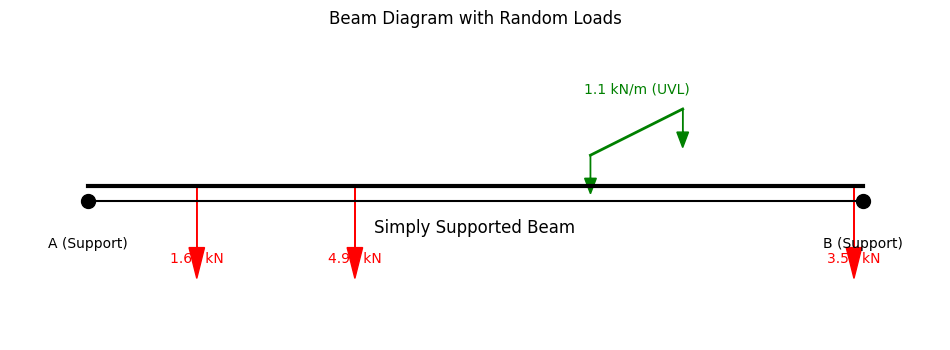

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Beam parameters
beam_length = 10  # in meters
num_loads = random.randint(3, 6)  # Random number of loads

# Generate random loads as done before
loads = []
for i in range(num_loads):
    load_type = random.choice(['UDL', 'UVL', 'Point'])
    position = round(random.uniform(0, beam_length), 2)
    magnitude = round(random.uniform(1, 5), 2)

    if load_type == 'UDL':
        start = round(random.uniform(0, beam_length - 1), 2)
        end = round(random.uniform(start + 1, beam_length), 2)
        loads.append((load_type, magnitude, start, end))
    elif load_type == 'UVL':
        start = round(random.uniform(0, beam_length - 1), 2)
        end = round(random.uniform(start + 1, beam_length), 2)
        loads.append((load_type, magnitude, start, end))
    elif load_type == 'Point':
        loads.append((load_type, magnitude, position))

# Plotting the beam and loads
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the beam as a horizontal line
ax.plot([0, beam_length], [0, 0], 'black', linewidth=3)
ax.text(beam_length / 2, -0.3, "Simply Supported Beam", ha='center', fontsize=12)

# Plot each load type
for load in loads:
    if load[0] == 'UDL':
        _, magnitude, start, end = load
        ax.plot([start, end], [0.2, 0.2], color="blue", linewidth=5)
        ax.arrow(start, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="blue", ec="blue")
        ax.arrow(end, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="blue", ec="blue")
        ax.text((start + end) / 2, 0.3, f"{magnitude} kN/m", color="blue", ha="center")

    elif load[0] == 'UVL':
        _, magnitude, start, end = load
        ax.plot([start, end], [0.2, 0.5], color="green", linewidth=2)
        ax.arrow(start, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="green", ec="green")
        ax.arrow(end, 0.5, 0, -0.15, head_width=0.15, head_length=0.1, fc="green", ec="green")
        ax.text((start + end) / 2, 0.6, f"{magnitude} kN/m (UVL)", color="green", ha="center")

    elif load[0] == 'Point':
        _, magnitude, position = load
        ax.arrow(position, 0, 0, -0.4, head_width=0.2, head_length=0.2, fc="red", ec="red")
        ax.text(position, -0.5, f"{magnitude} kN", color="red", ha="center")

# Plot supports at each end of the beam
ax.plot([0, beam_length], [-0.1, -0.1], 'black', marker='o', markersize=10)
ax.text(0, -0.4, "A (Support)", ha='center', fontsize=10)
ax.text(beam_length, -0.4, "B (Support)", ha='center', fontsize=10)

# Configure plot appearance
ax.set_xlim(-1, beam_length + 1)
ax.set_ylim(-1, 1)
ax.axis('off')
plt.title("Beam Diagram with Random Loads")

# Show the plot
plt.show()


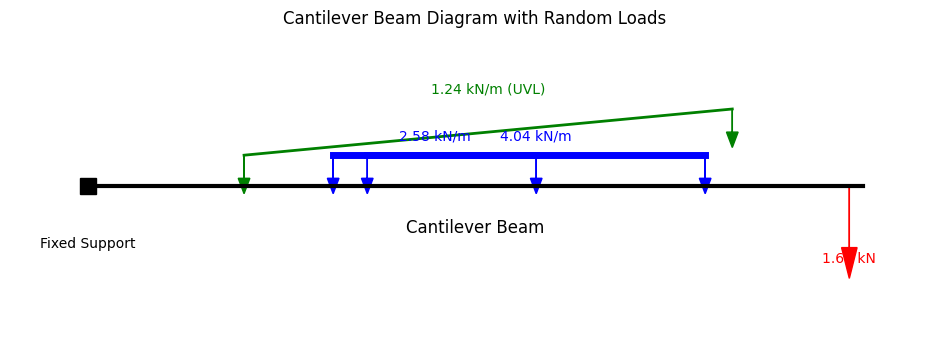

/* Beam parameters for Cantilever Beam */
L: 10;
E: 210000000000.0;
I: 5e-06;
EI: E*I;
/* UVL from 2.02 to 8.32 with max 1.24 kN/m */
V(x) := V(x) := 0 - (1.24/6.300000000000001)*(x - 2.02)^2/2*heaviside(x - 2.02);
/* UDL from 3.61 to 7.97 with 4.04 kN/m */
V(x) := V(x) := 0 - (1.24/6.300000000000001)*(x - 2.02)^2/2*heaviside(x - 2.02) - (4.04)*(7.97 - x)*heaviside(x - 3.61);
/* UDL from 3.17 to 5.79 with 2.58 kN/m */
V(x) := V(x) := 0 - (1.24/6.300000000000001)*(x - 2.02)^2/2*heaviside(x - 2.02) - (4.04)*(7.97 - x)*heaviside(x - 3.61) - (2.58)*(5.79 - x)*heaviside(x - 3.17);
/* Point Load of 1.69 kN at 9.83 */
V(x) := V(x) := 0 - (1.24/6.300000000000001)*(x - 2.02)^2/2*heaviside(x - 2.02) - (4.04)*(7.97 - x)*heaviside(x - 3.61) - (2.58)*(5.79 - x)*heaviside(x - 3.17) - 1.69*heaviside(x - 9.83);
/* Bending Moment for Cantilever Beam */
M(x) := integrate(V(x), x);
/* Deflection equation */
ODE: diff(y, x, 2) = M(x)/EI;
y(x) := integrate(integrate(M(x)/EI, x) + C1, x) + C2;
solve([y(0) =

In [3]:
import matplotlib.pyplot as plt
import random

# Beam parameters
beam_length = 10  # Length of the cantilever beam in meters
E = 210e9  # Modulus of Elasticity in Pascals
I = 5e-6  # Moment of Inertia in m^4
num_loads = random.randint(2, 4)  # Number of random loads

# Generate random loads (UDL, UVL, Point Load)
loads = []
for i in range(num_loads):
    load_type = random.choice(['UDL', 'UVL', 'Point'])
    position = round(random.uniform(0, beam_length), 2)
    magnitude = round(random.uniform(1, 5), 2)

    if load_type == 'UDL':
        start = round(random.uniform(0, beam_length - 1), 2)
        end = round(random.uniform(start + 1, beam_length), 2)
        loads.append((load_type, magnitude, start, end))
    elif load_type == 'UVL':
        start = round(random.uniform(0, beam_length - 1), 2)
        end = round(random.uniform(start + 1, beam_length), 2)
        loads.append((load_type, magnitude, start, end))
    elif load_type == 'Point':
        loads.append((load_type, magnitude, position))

# Plot the Cantilever Beam with loads
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot([0, beam_length], [0, 0], 'black', linewidth=3)
ax.text(beam_length / 2, -0.3, "Cantilever Beam", ha='center', fontsize=12)

# Plot each load type
for load in loads:
    if load[0] == 'UDL':
        _, magnitude, start, end = load
        ax.plot([start, end], [0.2, 0.2], color="blue", linewidth=5)
        ax.arrow(start, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="blue", ec="blue")
        ax.arrow(end, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="blue", ec="blue")
        ax.text((start + end) / 2, 0.3, f"{magnitude} kN/m", color="blue", ha="center")

    elif load[0] == 'UVL':
        _, magnitude, start, end = load
        ax.plot([start, end], [0.2, 0.5], color="green", linewidth=2)
        ax.arrow(start, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="green", ec="green")
        ax.arrow(end, 0.5, 0, -0.15, head_width=0.15, head_length=0.1, fc="green", ec="green")
        ax.text((start + end) / 2, 0.6, f"{magnitude} kN/m (UVL)", color="green", ha="center")

    elif load[0] == 'Point':
        _, magnitude, position = load
        ax.arrow(position, 0, 0, -0.4, head_width=0.2, head_length=0.2, fc="red", ec="red")
        ax.text(position, -0.5, f"{magnitude} kN", color="red", ha="center")

# Fixing and labeling the cantilever support
ax.plot(0, 0, 'black', marker='s', markersize=12)
ax.text(0, -0.4, "Fixed Support", ha='center', fontsize=10)

# Plot adjustments
ax.set_xlim(-1, beam_length + 1)
ax.set_ylim(-1, 1)
ax.axis('off')
plt.title("Cantilever Beam Diagram with Random Loads")
plt.show()

# Generate wxMaxima code for Cantilever Beam
def generate_wxmaxima_cantilever(loads):
    wxmaxima_code = []

    # Initial definitions
    wxmaxima_code.append("/* Beam parameters for Cantilever Beam */")
    wxmaxima_code.append(f"L: {beam_length};")
    wxmaxima_code.append(f"E: {E};")
    wxmaxima_code.append(f"I: {I};")
    wxmaxima_code.append("EI: E*I;")

    # Initialize Shear Force equation
    shear_force_expr = "V(x) := 0"

    # Apply each load to shear force and bending moment expressions
    for load in loads:
        if load[0] == 'UDL':
            magnitude, start, end = load[1], load[2], load[3]
            shear_force_expr += f" - ({magnitude})*({end} - x)*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UDL from {start} to {end} with {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'UVL':
            magnitude, start, end = load[1], load[2], load[3]
            shear_force_expr += f" - ({magnitude}/{end - start})*(x - {start})^2/2*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UVL from {start} to {end} with max {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'Point':
            magnitude, position = load[1], load[2]
            shear_force_expr += f" - {magnitude}*heaviside(x - {position})"
            wxmaxima_code.append(f"/* Point Load of {magnitude} kN at {position} */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

    # Bending moment by integrating V(x)
    wxmaxima_code.append("/* Bending Moment for Cantilever Beam */")
    wxmaxima_code.append("M(x) := integrate(V(x), x);")

    # Deflection ODE
    wxmaxima_code.append("/* Deflection equation */")
    wxmaxima_code.append("ODE: diff(y, x, 2) = M(x)/EI;")
    wxmaxima_code.append("y(x) := integrate(integrate(M(x)/EI, x) + C1, x) + C2;")

    # Boundary conditions for a cantilever beam (y(0) = 0, dy/dx(0) = 0)
    wxmaxima_code.append("solve([y(0) = 0, 'diff(y(x), x, 1) = 0 at x=0'], [C1, C2]);")

    # Plot commands for shear, bending, and deflection
    wxmaxima_code.append("plot2d(V(x), [x, 0, L], [ylabel, 'Shear Force V(x) [kN]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(M(x), [x, 0, L], [ylabel, 'Bending Moment M(x) [kN·m]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(y(x), [x, 0, L], [ylabel, 'Deflection y(x) [m]'], [xlabel, 'x (m)']);")

    return "\n".join(wxmaxima_code)

# Generate wxMaxima code for cantilever beam
cantilever_wxmaxima_code = generate_wxmaxima_cantilever(loads)

# Write wxMaxima code to a .txt file
with open("cantilever_beam_wxmaxima_code.txt", "w") as file:
    file.write(cantilever_wxmaxima_code)

# Print the wxMaxima code
print(cantilever_wxmaxima_code)


In [ ]:
Explanation
Plotting the Cantilever Beam: We draw the beam with random loads and a fixed support on the left. Loads include UDLs, UVLs, and point loads with different colors.
Generating wxMaxima Code:
The code initializes the beam length, modulus of elasticity
𝐸
E, and moment of inertia
𝐼
I.
Random loads are applied to the shear force and bending moment equations.
Boundary conditions for a cantilever beam (fixed at one end) are included.
Plot commands for shear force, bending moment, and deflection are included.
The wxMaxima code is saved as `cantilever_beam_wxmaxima

In [ ]:
The wxMaxima code is saved as cantilever_beam_wxmaxima_code.txt. Use a similar approach for the overhanging beam with adjustments for boundary conditions and support configuration. Let me know if you'd like the code for the overhanging beam as well.

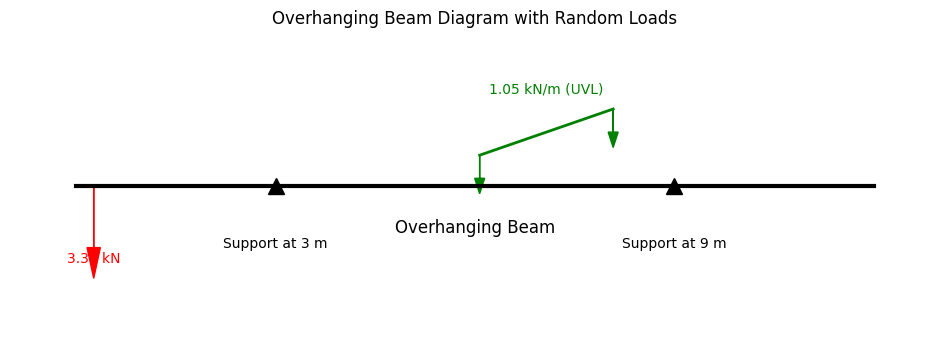

/* Beam parameters for Overhanging Beam */
L: 12;
E: 210000000000.0;
I: 5e-06;
EI: E*I;
Support1: 3;
Support2: 9;
/* Point Load of 3.34 kN at 0.26 */
V(x) := V(x) := 0 - 3.34*heaviside(x - 0.26);
/* UVL from 6.07 to 8.08 with max 1.05 kN/m */
V(x) := V(x) := 0 - 3.34*heaviside(x - 0.26) - (1.05/2.01)*(x - 6.07)^2/2*heaviside(x - 6.07);
/* Bending Moment for Overhanging Beam */
M(x) := integrate(V(x), x);
/* Deflection equation */
ODE: diff(y, x, 2) = M(x)/EI;
y(x) := integrate(integrate(M(x)/EI, x) + C1, x) + C2;
solve([y(Support1) = 0, y(Support2) = 0], [C1, C2]);
plot2d(V(x), [x, 0, L], [ylabel, 'Shear Force V(x) [kN]'], [xlabel, 'x (m)']);
plot2d(M(x), [x, 0, L], [ylabel, 'Bending Moment M(x) [kN·m]'], [xlabel, 'x (m)']);
plot2d(y(x), [x, 0, L], [ylabel, 'Deflection y(x) [m]'], [xlabel, 'x (m)']);


In [4]:
import matplotlib.pyplot as plt
import random

# Beam parameters
beam_length = 12  # Total length of the overhanging beam in meters
support1 = 3  # Position of the first support from the left end in meters
support2 = 9  # Position of the second support from the left end in meters
E = 210e9  # Modulus of Elasticity in Pascals
I = 5e-6  # Moment of Inertia in m^4
num_loads = random.randint(2, 4)  # Number of random loads

# Generate random loads (UDL, UVL, Point Load)
loads = []
for i in range(num_loads):
    load_type = random.choice(['UDL', 'UVL', 'Point'])
    position = round(random.uniform(0, beam_length), 2)
    magnitude = round(random.uniform(1, 5), 2)

    if load_type == 'UDL':
        start = round(random.uniform(0, beam_length - 1), 2)
        end = round(random.uniform(start + 1, beam_length), 2)
        loads.append((load_type, magnitude, start, end))
    elif load_type == 'UVL':
        start = round(random.uniform(0, beam_length - 1), 2)
        end = round(random.uniform(start + 1, beam_length), 2)
        loads.append((load_type, magnitude, start, end))
    elif load_type == 'Point':
        loads.append((load_type, magnitude, position))

# Plot the Overhanging Beam with loads
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot([0, beam_length], [0, 0], 'black', linewidth=3)
ax.text(beam_length / 2, -0.3, "Overhanging Beam", ha='center', fontsize=12)

# Plot the supports
ax.plot(support1, 0, 'black', marker='^', markersize=12)
ax.plot(support2, 0, 'black', marker='^', markersize=12)
ax.text(support1, -0.4, f"Support at {support1} m", ha='center', fontsize=10)
ax.text(support2, -0.4, f"Support at {support2} m", ha='center', fontsize=10)

# Plot each load type
for load in loads:
    if load[0] == 'UDL':
        _, magnitude, start, end = load
        ax.plot([start, end], [0.2, 0.2], color="blue", linewidth=5)
        ax.arrow(start, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="blue", ec="blue")
        ax.arrow(end, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="blue", ec="blue")
        ax.text((start + end) / 2, 0.3, f"{magnitude} kN/m", color="blue", ha="center")

    elif load[0] == 'UVL':
        _, magnitude, start, end = load
        ax.plot([start, end], [0.2, 0.5], color="green", linewidth=2)
        ax.arrow(start, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="green", ec="green")
        ax.arrow(end, 0.5, 0, -0.15, head_width=0.15, head_length=0.1, fc="green", ec="green")
        ax.text((start + end) / 2, 0.6, f"{magnitude} kN/m (UVL)", color="green", ha="center")

    elif load[0] == 'Point':
        _, magnitude, position = load
        ax.arrow(position, 0, 0, -0.4, head_width=0.2, head_length=0.2, fc="red", ec="red")
        ax.text(position, -0.5, f"{magnitude} kN", color="red", ha="center")

# Plot adjustments
ax.set_xlim(-1, beam_length + 1)
ax.set_ylim(-1, 1)
ax.axis('off')
plt.title("Overhanging Beam Diagram with Random Loads")
plt.show()

# Generate wxMaxima code for Overhanging Beam
def generate_wxmaxima_overhanging(loads, support1, support2):
    wxmaxima_code = []

    # Initial definitions
    wxmaxima_code.append("/* Beam parameters for Overhanging Beam */")
    wxmaxima_code.append(f"L: {beam_length};")
    wxmaxima_code.append(f"E: {E};")
    wxmaxima_code.append(f"I: {I};")
    wxmaxima_code.append("EI: E*I;")
    wxmaxima_code.append(f"Support1: {support1};")
    wxmaxima_code.append(f"Support2: {support2};")

    # Initialize Shear Force equation
    shear_force_expr = "V(x) := 0"

    # Apply each load to shear force and bending moment expressions
    for load in loads:
        if load[0] == 'UDL':
            magnitude, start, end = load[1], load[2], load[3]
            shear_force_expr += f" - ({magnitude})*({end} - x)*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UDL from {start} to {end} with {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'UVL':
            magnitude, start, end = load[1], load[2], load[3]
            shear_force_expr += f" - ({magnitude}/{end - start})*(x - {start})^2/2*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UVL from {start} to {end} with max {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'Point':
            magnitude, position = load[1], load[2]
            shear_force_expr += f" - {magnitude}*heaviside(x - {position})"
            wxmaxima_code.append(f"/* Point Load of {magnitude} kN at {position} */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

    # Bending moment by integrating V(x)
    wxmaxima_code.append("/* Bending Moment for Overhanging Beam */")
    wxmaxima_code.append("M(x) := integrate(V(x), x);")

    # Deflection ODE
    wxmaxima_code.append("/* Deflection equation */")
    wxmaxima_code.append("ODE: diff(y, x, 2) = M(x)/EI;")
    wxmaxima_code.append("y(x) := integrate(integrate(M(x)/EI, x) + C1, x) + C2;")

    # Boundary conditions for overhanging beam (reactions at support1 and support2)
    wxmaxima_code.append("solve([y(Support1) = 0, y(Support2) = 0], [C1, C2]);")

    # Plot commands for shear, bending, and deflection
    wxmaxima_code.append("plot2d(V(x), [x, 0, L], [ylabel, 'Shear Force V(x) [kN]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(M(x), [x, 0, L], [ylabel, 'Bending Moment M(x) [kN·m]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(y(x), [x, 0, L], [ylabel, 'Deflection y(x) [m]'], [xlabel, 'x (m)']);")

    return "\n".join(wxmaxima_code)

# Generate wxMaxima code for overhanging beam
overhanging_wxmaxima_code = generate_wxmaxima_overhanging(loads, support1, support2)

# Write wxMaxima code to a .txt file
with open("overhanging_beam_wxmaxima_code.txt", "w") as file:
    file.write(overhanging_wxmaxima_code)

# Print the wxMaxima code
print(overhanging_wxmaxima_code)


In [ ]:
Explanation
Plotting the Overhanging Beam: The beam is drawn with supports at two points and random loads distributed across the beam. Loads include UDLs, UVLs, and point loads with different colors.
Generating wxMaxima Code:
Each load type is converted into shear force and bending moment expressions.
wxMaxima code includes definitions, boundary conditions, and plots for shear force, bending moment, and deflection.
File Export: The wxMaxima code is saved to overhanging_beam_wxmaxima_code.txt.
This code gives a full overhanging beam solution in wxMaxima format, ready for analysis. Let me know if you have questions or would like further customization.

In [ ]:
For a continuous simply supported beam with multiple spans (10 or more supports), we’ll model random loads between each support. This approach allows flexibility for distributed loads, point loads, and varying intensities across multiple spans. We'll generate random load types and positions across the beam spans, create a plot for visualization, and output wxMaxima code for shear force, bending moment, and deflection calculations.

Continuous Simply Supported Beam Code (10+ Supports)
Here's the Python code to generate the beam model, random loads, plot, and wxMaxima code output:

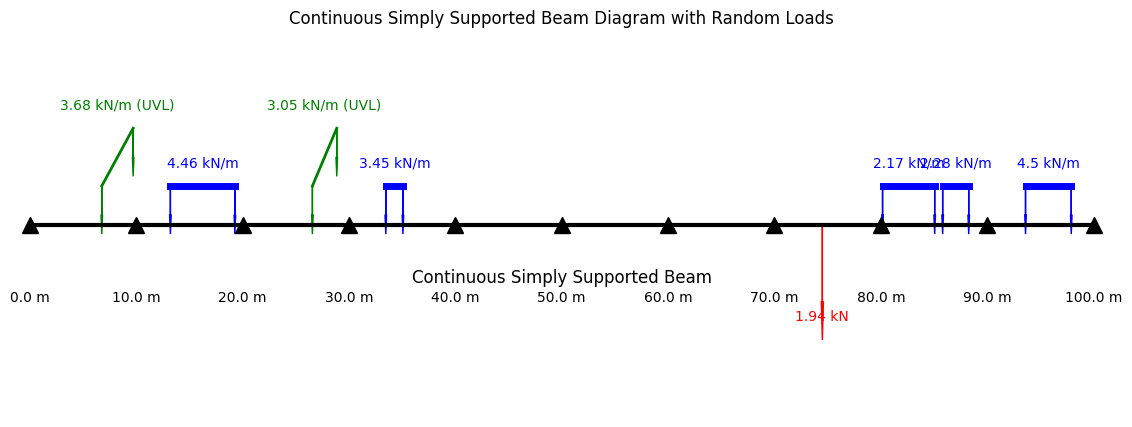

/* Continuous Simply Supported Beam Parameters */
L: 100;
E: 210000000000.0;
I: 5e-06;
EI: E*I;
Support1: 0.0;
Support2: 10.0;
Support3: 20.0;
Support4: 30.0;
Support5: 40.0;
Support6: 50.0;
Support7: 60.0;
Support8: 70.0;
Support9: 80.0;
Support10: 90.0;
Support11: 100.0;
/* UDL from 85.81 to 88.26 with 2.28 kN/m */
V(x) := V(x) := 0 - (2.28)*(88.26 - x)*heaviside(x - 85.81);
/* UDL from 80.16 to 85.06 with 2.17 kN/m */
V(x) := V(x) := 0 - (2.28)*(88.26 - x)*heaviside(x - 85.81) - (2.17)*(85.06 - x)*heaviside(x - 80.16);
/* Point Load of 1.94 kN at 74.5 */
V(x) := V(x) := 0 - (2.28)*(88.26 - x)*heaviside(x - 85.81) - (2.17)*(85.06 - x)*heaviside(x - 80.16) - 1.94*heaviside(x - 74.5);
/* UDL from 13.21 to 19.27 with 4.46 kN/m */
V(x) := V(x) := 0 - (2.28)*(88.26 - x)*heaviside(x - 85.81) - (2.17)*(85.06 - x)*heaviside(x - 80.16) - 1.94*heaviside(x - 74.5) - (4.46)*(19.27 - x)*heaviside(x - 13.21);
/* UVL from 6.76 to 9.71 with max 3.68 kN/m */
V(x) := V(x) := 0 - (2.28)*(88.26 - x)*hea

In [5]:
import matplotlib.pyplot as plt
import random

# Beam and material parameters
num_spans = 10  # Number of spans (10 or more supports means at least 9 spans)
beam_length = 100  # Total length of the beam in meters
span_length = beam_length / num_spans  # Length of each span
supports = [i * span_length for i in range(num_spans + 1)]
E = 210e9  # Modulus of Elasticity in Pascals
I = 5e-6  # Moment of Inertia in m^4

# Load parameters
num_loads = random.randint(5, 15)  # Random number of loads across spans

# Generate random loads (UDL, UVL, Point Load)
loads = []
for _ in range(num_loads):
    load_type = random.choice(['UDL', 'UVL', 'Point'])
    span_index = random.randint(0, num_spans - 1)
    position = round(random.uniform(supports[span_index], supports[span_index + 1]), 2)
    magnitude = round(random.uniform(1, 5), 2)

    if load_type == 'UDL':
        start = round(random.uniform(supports[span_index], supports[span_index + 1] - 1), 2)
        end = round(random.uniform(start + 1, supports[span_index + 1]), 2)
        loads.append((load_type, magnitude, start, end))
    elif load_type == 'UVL':
        start = round(random.uniform(supports[span_index], supports[span_index + 1] - 1), 2)
        end = round(random.uniform(start + 1, supports[span_index + 1]), 2)
        loads.append((load_type, magnitude, start, end))
    elif load_type == 'Point':
        loads.append((load_type, magnitude, position))

# Plot the Continuous Simply Supported Beam with loads
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot([0, beam_length], [0, 0], 'black', linewidth=3)
ax.text(beam_length / 2, -0.3, "Continuous Simply Supported Beam", ha='center', fontsize=12)

# Plot the supports
for support in supports:
    ax.plot(support, 0, 'black', marker='^', markersize=12)
    ax.text(support, -0.4, f"{support} m", ha='center', fontsize=10)

# Plot each load type
for load in loads:
    if load[0] == 'UDL':
        _, magnitude, start, end = load
        ax.plot([start, end], [0.2, 0.2], color="blue", linewidth=5)
        ax.arrow(start, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="blue", ec="blue")
        ax.arrow(end, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="blue", ec="blue")
        ax.text((start + end) / 2, 0.3, f"{magnitude} kN/m", color="blue", ha="center")

    elif load[0] == 'UVL':
        _, magnitude, start, end = load
        ax.plot([start, end], [0.2, 0.5], color="green", linewidth=2)
        ax.arrow(start, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="green", ec="green")
        ax.arrow(end, 0.5, 0, -0.15, head_width=0.15, head_length=0.1, fc="green", ec="green")
        ax.text((start + end) / 2, 0.6, f"{magnitude} kN/m (UVL)", color="green", ha="center")

    elif load[0] == 'Point':
        _, magnitude, position = load
        ax.arrow(position, 0, 0, -0.4, head_width=0.2, head_length=0.2, fc="red", ec="red")
        ax.text(position, -0.5, f"{magnitude} kN", color="red", ha="center")

# Plot adjustments
ax.set_xlim(-1, beam_length + 1)
ax.set_ylim(-1, 1)
ax.axis('off')
plt.title("Continuous Simply Supported Beam Diagram with Random Loads")
plt.show()

# Generate wxMaxima code for Continuous Beam
def generate_wxmaxima_continuous(loads, supports):
    wxmaxima_code = []

    # Initial definitions
    wxmaxima_code.append("/* Continuous Simply Supported Beam Parameters */")
    wxmaxima_code.append(f"L: {beam_length};")
    wxmaxima_code.append(f"E: {E};")
    wxmaxima_code.append(f"I: {I};")
    wxmaxima_code.append("EI: E*I;")
    for i, support in enumerate(supports):
        wxmaxima_code.append(f"Support{i + 1}: {support};")

    # Initialize Shear Force equation
    shear_force_expr = "V(x) := 0"

    # Apply each load to shear force and bending moment expressions
    for load in loads:
        if load[0] == 'UDL':
            magnitude, start, end = load[1], load[2], load[3]
            shear_force_expr += f" - ({magnitude})*({end} - x)*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UDL from {start} to {end} with {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'UVL':
            magnitude, start, end = load[1], load[2], load[3]
            shear_force_expr += f" - ({magnitude}/{end - start})*(x - {start})^2/2*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UVL from {start} to {end} with max {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'Point':
            magnitude, position = load[1], load[2]
            shear_force_expr += f" - {magnitude}*heaviside(x - {position})"
            wxmaxima_code.append(f"/* Point Load of {magnitude} kN at {position} */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

    # Bending moment by integrating V(x)
    wxmaxima_code.append("/* Bending Moment for Continuous Simply Supported Beam */")
    wxmaxima_code.append("M(x) := integrate(V(x), x);")

    # Deflection ODE
    wxmaxima_code.append("/* Deflection equation */")
    wxmaxima_code.append("ODE: diff(y, x, 2) = M(x)/EI;")
    wxmaxima_code.append("y(x) := integrate(integrate(M(x)/EI, x) + C1, x) + C2;")

    # Boundary conditions for each support (y(x) = 0 at each support)
    bc_conditions = ", ".join([f"y(Support{i+1}) = 0" for i in range(len(supports))])
    wxmaxima_code.append(f"solve([{bc_conditions}], [C1, C2]);")

    # Plot commands for shear, bending, and deflection
    wxmaxima_code.append("plot2d(V(x), [x, 0, L], [ylabel, 'Shear Force V(x) [kN]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(M(x), [x, 0, L], [ylabel, 'Bending Moment M(x) [kN·m]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(y(x), [x, 0, L], [ylabel, 'Deflection y(x) [m]'], [xlabel, 'x (m)']);")

    return "\n".join(wxmaxima_code)

# Generate wxMaxima code for continuous simply supported beam
continuous_wxmaxima_code = generate_wxmaxima_continuous(loads, supports)

# Write wxMaxima code to a .txt file
with open("continuous_beam_wxmaxima_code.txt", "w") as file:
    file.write(continuous_wxmaxima_code)

# Print the wxMaxima code
print(continuous_wxmaxima_code)


In [ ]:
Explanation
Beam Setup: A continuous beam with multiple supports is created with spans of equal length.
Random Loads: Random UDLs, UVLs, and point loads are assigned across the spans.
Visualization: The beam with supports and loads is plotted for clarity.
wxMaxima Code Generation:
Defines shear force, bending moment, and deflection equations.
Exports code to "continuous_beam_wxmaxima_code.txt" for analysis in wxMaxima.
This output can be modified to adjust for more or fewer spans or specific load configurations. Let me know if you need further customization!

In [ ]:
To model a continuous cantilever beam with random loads, we'll generate multiple spans with varying loads, similar to the previous example. In this scenario, the cantilever beam will extend from a fixed support, and we'll calculate shear forces, bending moments, and deflections due to the loads applied along its length.

Continuous Cantilever Beam Code
Here's the Python code to generate the beam model, random loads, plot, and export wxMaxima code for a continuous cantilever beam:

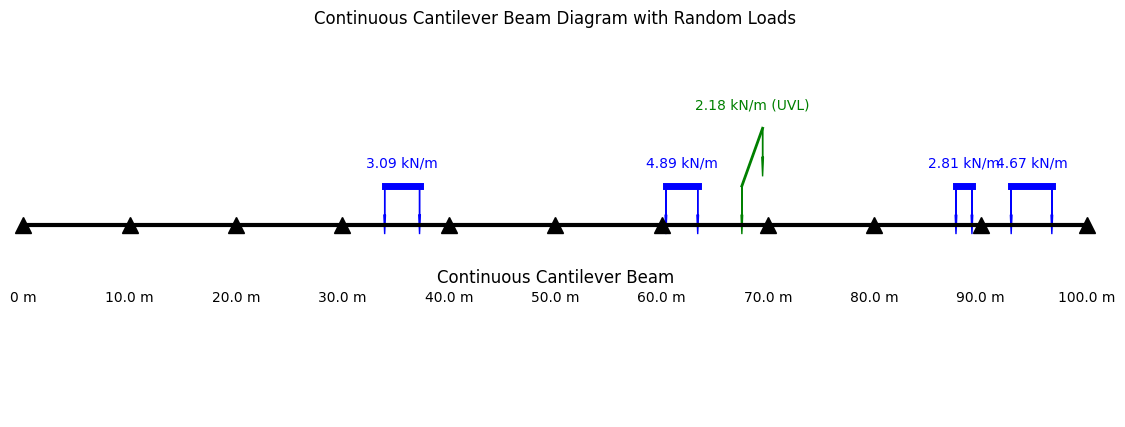

/* Continuous Cantilever Beam Parameters */
L: 100;
E: 210000000000.0;
I: 5e-06;
EI: E*I;
/* Support at fixed end */
/* UDL from 33.97 to 37.25 with 3.09 kN/m */
V(x) := V(x) := 0 - (3.09)*(37.25 - x)*heaviside(x - 33.97);
/* UVL from 67.55 to 69.5 with max 2.18 kN/m */
V(x) := V(x) := 0 - (3.09)*(37.25 - x)*heaviside(x - 33.97) - (2.18/1.9500000000000028)*(x - 67.55)^2/2*heaviside(x - 67.55);
/* UDL from 87.68 to 89.18 with 2.81 kN/m */
V(x) := V(x) := 0 - (3.09)*(37.25 - x)*heaviside(x - 33.97) - (2.18/1.9500000000000028)*(x - 67.55)^2/2*heaviside(x - 67.55) - (2.81)*(89.18 - x)*heaviside(x - 87.68);
/* UDL from 60.41 to 63.4 with 4.89 kN/m */
V(x) := V(x) := 0 - (3.09)*(37.25 - x)*heaviside(x - 33.97) - (2.18/1.9500000000000028)*(x - 67.55)^2/2*heaviside(x - 67.55) - (2.81)*(89.18 - x)*heaviside(x - 87.68) - (4.89)*(63.4 - x)*heaviside(x - 60.41);
/* UDL from 92.87 to 96.69 with 4.67 kN/m */
V(x) := V(x) := 0 - (3.09)*(37.25 - x)*heaviside(x - 33.97) - (2.18/1.9500000000000028)*(x -

In [6]:
import matplotlib.pyplot as plt
import random

# Beam and material parameters
num_spans = 10  # Number of spans
beam_length = 100  # Total length of the beam in meters
span_length = beam_length / num_spans  # Length of each span
supports = [0] + [i * span_length for i in range(1, num_spans + 1)]
E = 210e9  # Modulus of Elasticity in Pascals
I = 5e-6  # Moment of Inertia in m^4

# Load parameters
num_loads = random.randint(5, 15)  # Random number of loads across spans

# Generate random loads (UDL, UVL, Point Load)
loads = []
for _ in range(num_loads):
    load_type = random.choice(['UDL', 'UVL', 'Point'])
    span_index = random.randint(0, num_spans - 1)
    position = round(random.uniform(supports[span_index], supports[span_index + 1]), 2)
    magnitude = round(random.uniform(1, 5), 2)

    if load_type == 'UDL':
        start = round(random.uniform(supports[span_index], supports[span_index + 1] - 1), 2)
        end = round(random.uniform(start + 1, supports[span_index + 1]), 2)
        loads.append((load_type, magnitude, start, end))
    elif load_type == 'UVL':
        start = round(random.uniform(supports[span_index], supports[span_index + 1] - 1), 2)
        end = round(random.uniform(start + 1, supports[span_index + 1]), 2)
        loads.append((load_type, magnitude, start, end))
    elif load_type == 'Point':
        loads.append((load_type, magnitude, position))

# Plot the Continuous Cantilever Beam with loads
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot([0, beam_length], [0, 0], 'black', linewidth=3)
ax.text(beam_length / 2, -0.3, "Continuous Cantilever Beam", ha='center', fontsize=12)

# Plot the supports
for support in supports:
    ax.plot(support, 0, 'black', marker='^', markersize=12)
    ax.text(support, -0.4, f"{support} m", ha='center', fontsize=10)

# Plot each load type
for load in loads:
    if load[0] == 'UDL':
        _, magnitude, start, end = load
        ax.plot([start, end], [0.2, 0.2], color="blue", linewidth=5)
        ax.arrow(start, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="blue", ec="blue")
        ax.arrow(end, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="blue", ec="blue")
        ax.text((start + end) / 2, 0.3, f"{magnitude} kN/m", color="blue", ha="center")

    elif load[0] == 'UVL':
        _, magnitude, start, end = load
        ax.plot([start, end], [0.2, 0.5], color="green", linewidth=2)
        ax.arrow(start, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="green", ec="green")
        ax.arrow(end, 0.5, 0, -0.15, head_width=0.15, head_length=0.1, fc="green", ec="green")
        ax.text((start + end) / 2, 0.6, f"{magnitude} kN/m (UVL)", color="green", ha="center")

    elif load[0] == 'Point':
        _, magnitude, position = load
        ax.arrow(position, 0, 0, -0.4, head_width=0.2, head_length=0.2, fc="red", ec="red")
        ax.text(position, -0.5, f"{magnitude} kN", color="red", ha="center")

# Plot adjustments
ax.set_xlim(-1, beam_length + 1)
ax.set_ylim(-1, 1)
ax.axis('off')
plt.title("Continuous Cantilever Beam Diagram with Random Loads")
plt.show()

# Generate wxMaxima code for Continuous Cantilever Beam
def generate_wxmaxima_cantilever(loads, supports):
    wxmaxima_code = []

    # Initial definitions
    wxmaxima_code.append("/* Continuous Cantilever Beam Parameters */")
    wxmaxima_code.append(f"L: {beam_length};")
    wxmaxima_code.append(f"E: {E};")
    wxmaxima_code.append(f"I: {I};")
    wxmaxima_code.append("EI: E*I;")
    wxmaxima_code.append("/* Support at fixed end */")

    # Initialize Shear Force equation
    shear_force_expr = "V(x) := 0"

    # Apply each load to shear force and bending moment expressions
    for load in loads:
        if load[0] == 'UDL':
            magnitude, start, end = load[1], load[2], load[3]
            shear_force_expr += f" - ({magnitude})*({end} - x)*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UDL from {start} to {end} with {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'UVL':
            magnitude, start, end = load[1], load[2], load[3]
            shear_force_expr += f" - ({magnitude}/{end - start})*(x - {start})^2/2*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UVL from {start} to {end} with max {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'Point':
            magnitude, position = load[1], load[2]
            shear_force_expr += f" - {magnitude}*heaviside(x - {position})"
            wxmaxima_code.append(f"/* Point Load of {magnitude} kN at {position} */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

    # Bending moment by integrating V(x)
    wxmaxima_code.append("/* Bending Moment for Continuous Cantilever Beam */")
    wxmaxima_code.append("M(x) := integrate(V(x), x);")

    # Deflection ODE
    wxmaxima_code.append("/* Deflection equation */")
    wxmaxima_code.append("ODE: diff(y, x, 2) = M(x)/EI;")
    wxmaxima_code.append("y(x) := integrate(integrate(M(x)/EI, x) + C1, x) + C2;")

    # Boundary conditions (fixed support at x = 0)
    wxmaxima_code.append("solve([y(0) = 0, diff(y, x, 0) = 0], [C1, C2]);")

    # Plot commands for shear, bending, and deflection
    wxmaxima_code.append("plot2d(V(x), [x, 0, L], [ylabel, 'Shear Force V(x) [kN]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(M(x), [x, 0, L], [ylabel, 'Bending Moment M(x) [kN·m]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(y(x), [x, 0, L], [ylabel, 'Deflection y(x) [m]'], [xlabel, 'x (m)']);")

    return "\n".join(wxmaxima_code)

# Generate wxMaxima code for continuous cantilever beam
cantilever_wxmaxima_code = generate_wxmaxima_cantilever(loads, supports)

# Write wxMaxima code to a .txt file
with open("cantilever_beam_wxmaxima_code.txt", "w") as file:
    file.write(cantilever_wxmaxima_code)

# Print the wxMaxima code
print(cantilever_wxmaxima_code)


In [ ]:
Explanation
Beam Setup: This code defines a continuous cantilever beam, where the first support is fixed, and there are additional supports along the beam.
Random Loads: It generates random Uniformly Distributed Loads (UDL), Uniformly Varying Loads (UVL), and Point Loads applied at random positions across the beam.
Visualization: The beam is visualized with markers indicating the location of supports and arrows representing the applied loads.
wxMaxima Code Generation: The script creates a string with the wxMaxima code to analyze the cantilever beam's shear force, bending moment, and deflection equations, and exports it to a text file named "cantilever_beam_wxmaxima_code.txt".
Output
After running the code, you will see the generated plots of the beam with loads, as well as the wxMaxima code that can be found in the text file. If you have any further requests or adjustments, let me know!

In [ ]:
To create a model for a continuous overhanging beam, we'll set up two configurations: one with both ends overhanging (hanging on both sides) and another with one side overhanging. Each configuration will have randomly generated loads (UDL, UVL, and point loads).

Continuous Overhanging Beam Code
Here’s the Python code that generates these configurations, plots the diagrams, and exports wxMaxima code for analysis:

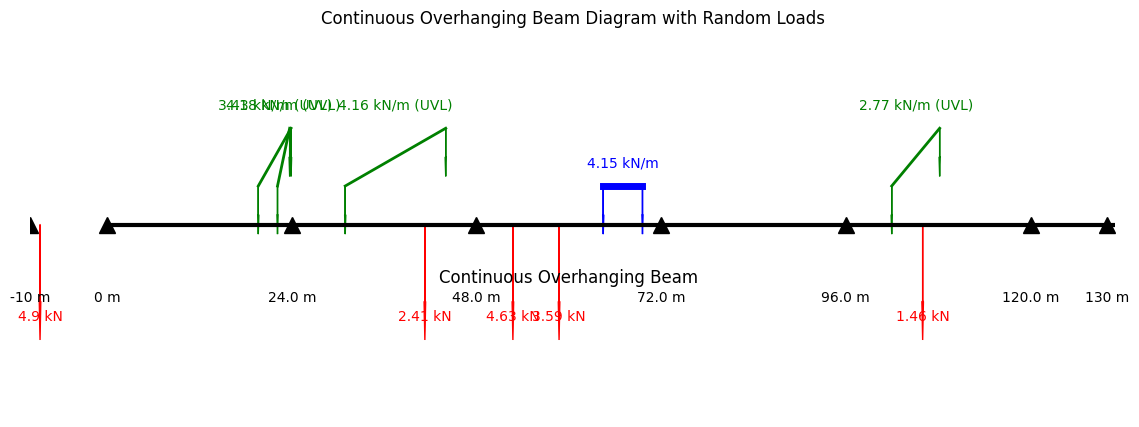

Generated wxMaxima code and saved to 'overhanging_beam_wxmaxima_code.txt'


In [8]:
import matplotlib.pyplot as plt
import random

# Parameters for the beam
beam_length = 120  # Total length of the beam in meters
num_spans = 5  # Number of spans (for continuous behavior)
span_length = beam_length / num_spans  # Length of each span

# Support locations
supports = [0] + [i * span_length for i in range(1, num_spans + 1)]
# For overhanging on both sides, add overhang lengths
overhang_left = 10  # Left overhang
overhang_right = 10  # Right overhang
supports = [-overhang_left] + supports + [beam_length + overhang_right]

# Load parameters
num_loads = random.randint(5, 15)  # Random number of loads

# Generate random loads
loads = []
for _ in range(num_loads):
    load_type = random.choice(['UDL', 'UVL', 'Point'])
    span_index = random.randint(0, num_spans)  # Allow loads on both sides of the supports
    position = round(random.uniform(supports[span_index], supports[span_index + 1]), 2)
    magnitude = round(random.uniform(1, 5), 2)

    if load_type == 'UDL':
        start = round(random.uniform(supports[span_index], supports[span_index + 1] - 1), 2)
        end = round(random.uniform(start + 1, supports[span_index + 1]), 2)
        loads.append((load_type, magnitude, start, end))
    elif load_type == 'UVL':
        start = round(random.uniform(supports[span_index], supports[span_index + 1] - 1), 2)
        end = round(random.uniform(start + 1, supports[span_index + 1]), 2)
        loads.append((load_type, magnitude, start, end))
    elif load_type == 'Point':
        loads.append((load_type, magnitude, position))

# Plot the Continuous Overhanging Beam with loads
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot([0, beam_length + 2 * overhang_right], [0, 0], 'black', linewidth=3)
ax.text(beam_length / 2, -0.3, "Continuous Overhanging Beam", ha='center', fontsize=12)

# Plot the supports
for support in supports:
    ax.plot(support, 0, 'black', marker='^', markersize=12)
    ax.text(support, -0.4, f"{support} m", ha='center', fontsize=10)

# Plot each load type
for load in loads:
    if load[0] == 'UDL':
        _, magnitude, start, end = load
        ax.plot([start, end], [0.2, 0.2], color="blue", linewidth=5)
        ax.arrow(start, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="blue", ec="blue")
        ax.arrow(end, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="blue", ec="blue")
        ax.text((start + end) / 2, 0.3, f"{magnitude} kN/m", color="blue", ha="center")

    elif load[0] == 'UVL':
        _, magnitude, start, end = load
        ax.plot([start, end], [0.2, 0.5], color="green", linewidth=2)
        ax.arrow(start, 0.2, 0, -0.15, head_width=0.15, head_length=0.1, fc="green", ec="green")
        ax.arrow(end, 0.5, 0, -0.15, head_width=0.15, head_length=0.1, fc="green", ec="green")
        ax.text((start + end) / 2, 0.6, f"{magnitude} kN/m (UVL)", color="green", ha="center")

    elif load[0] == 'Point':
        _, magnitude, position = load
        ax.arrow(position, 0, 0, -0.4, head_width=0.2, head_length=0.2, fc="red", ec="red")
        ax.text(position, -0.5, f"{magnitude} kN", color="red", ha="center")

# Plot adjustments
ax.set_xlim(-1 * overhang_left, beam_length + overhang_right + 1)
ax.set_ylim(-1, 1)
ax.axis('off')
plt.title("Continuous Overhanging Beam Diagram with Random Loads")
plt.show()

# Generate wxMaxima code for Continuous Overhanging Beam
def generate_wxmaxima_overhanging(loads, supports):
    wxmaxima_code = []

    # Initial definitions
    wxmaxima_code.append("/* Continuous Overhanging Beam Parameters */")
    wxmaxima_code.append(f"L: {beam_length + overhang_right + overhang_left};")
    wxmaxima_code.append("overhang_left: {};".format(overhang_left))
    wxmaxima_code.append("overhang_right: {};".format(overhang_right))
    wxmaxima_code.append("/* Support locations */")
    wxmaxima_code.append("supports: [{}];".format(", ".join(map(str, supports))))
    wxmaxima_code.append("/* Initialize load parameters */")

    # Initialize Shear Force equation
    shear_force_expr = "V(x) := 0"

    # Apply each load to shear force and bending moment expressions
    for load in loads:
        if load[0] == 'UDL':
            magnitude, start, end = load[1], load[2], load[3]
            shear_force_expr += f" - ({magnitude})*({end} - x)*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UDL from {start} to {end} with {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'UVL':
            magnitude, start, end = load[1], load[2], load[3]
            shear_force_expr += f" - ({magnitude}/{end - start})*(x - {start})^2/2*heaviside(x - {start})"
            wxmaxima_code.append(f"/* UVL from {start} to {end} with max {magnitude} kN/m */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

        elif load[0] == 'Point':
            magnitude, position = load[1], load[2]
            shear_force_expr += f" - {magnitude}*heaviside(x - {position})"
            wxmaxima_code.append(f"/* Point Load of {magnitude} kN at {position} */")
            wxmaxima_code.append(f"V(x) := {shear_force_expr};")

    # Bending moment by integrating V(x)
    wxmaxima_code.append("/* Bending Moment for Continuous Overhanging Beam */")
    wxmaxima_code.append("M(x) := integrate(V(x), x);")

    # Deflection ODE
    wxmaxima_code.append("/* Deflection equation */")
    wxmaxima_code.append("ODE: diff(y, x, 2) = M(x)/EI;")
    wxmaxima_code.append("y(x) := integrate(integrate(M(x)/EI, x) + C1, x) + C2;")

    # Boundary conditions (fixed support at the left end)
    wxmaxima_code.append("solve([y(-overhang_left) = 0, diff(y, x, 0) = 0], [C1, C2]);")

    # Plot commands for shear, bending, and deflection
    wxmaxima_code.append("plot2d(V(x), [x, -overhang_left, L], [ylabel, 'Shear Force V(x) [kN]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(M(x), [x, -overhang_left, L], [ylabel, 'Bending Moment M(x) [kN·m]'], [xlabel, 'x (m)']);")
    wxmaxima_code.append("plot2d(y(x), [x, -overhang_left, L], [ylabel, 'Deflection y(x) [m]'], [xlabel, 'x (m)']);")

    return "\n".join(wxmaxima_code)

# Generate wxMaxima code for continuous overhanging beam
overhanging_wxmaxima_code = generate_wxmaxima_overhanging(loads, supports)

# Write wxMaxima code to a .txt file
with open("overhanging_beam_wxmaxima_code.txt", "w") as file:
    file.write(overhanging_wxmaxima_code)

print("Generated wxMaxima code and saved to 'overhanging_beam_wxmaxima_code.txt'")


In [ ]:
Explanation of the Code
Beam Parameters: The code defines a continuous overhanging beam with random supports, both left and right overhangs.

Load Generation: Randomly generates a mix of loads (UDL, UVL, Point) applied at random positions along the beam.

Plotting: The beam is plotted with arrows indicating the applied loads and supports.

wxMaxima Code Generation: The script compiles the equations governing the shear force, bending moment, and deflection into wxMaxima code format, which is exported to a text file.

Output
After running the code, the program will display a plot of the beam with the loads and save the wxMaxima code to "overhanging_beam_wxmaxima_code.txt".

If you need any further modifications or additional configurations, feel free to ask!